In [1]:

!pip uninstall tensorflow==2.8.0
!pip install tensorflow==2.0.0


Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.9.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.9.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86.3 MB 46 kB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
     |████████████████████████████████| 3.8 MB 42.2 MB/s 
     |████████████████████████████████| 449 kB 56.4 MB/s 
     |████████████████████████████████| 152 kB 47.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-n

In [2]:
from urllib.request import Request, urlopen  # Python 3
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
import sklearn.metrics 


In [4]:
url1 = ("https://raw.githubusercontent.com/rossel4/pothole_thesis/master/bachesf.csv")
url2 = ("https://raw.githubusercontent.com/rossel4/pothole_thesis/master/topef.csv")
url3 = ("https://raw.githubusercontent.com/rossel4/pothole_thesis/master/normalf.csv")
  

In [5]:
bache= pd.read_csv(url1)
bache['Activity']='bache'
tope= pd.read_csv(url2)
tope['Activity']='tope'

normal= pd.read_csv(url3)
normal['Activity']='normal'


In [6]:
print(bache['Activity'].value_counts())
print(tope['Activity'].value_counts())
print(normal['Activity'].value_counts())

bache    25704
Name: Activity, dtype: int64
tope    23086
Name: Activity, dtype: int64
normal    33082
Name: Activity, dtype: int64


In [7]:
df1 = pd.concat([bache,tope,normal])

In [8]:
def plotsaxis (df1,df2,df3):
  plt.figure( figsize= (30,10))
  plt.plot(df1.AX,label='AX bache')
  plt.plot(df2.AX, label='AX tope')
  plt.plot(df3.AX, label='AX normal')
  plt.legend()
  plt.show()
  plt.figure( figsize= (30,10))
  plt.plot(df1.AY,label='AY bache')
  plt.plot(df2.AY, label='AY tope')
  plt.plot(df3.AY, label='AY normal')
  plt.legend()
  plt.show()
  plt.figure( figsize= (30,10))
  plt.plot(df1.AZ,label='AZ bache')
  plt.plot(df2.AZ, label='AZ tope')
  plt.plot(df3.AZ, label='AZ normal')  
  plt.legend()
  plt.show()
  plt.figure( figsize= (30,10))
  plt.plot(df1.GX,label='GX bache')
  plt.plot(df2.GX, label='GX tope')
  plt.plot(df3.GX, label='GX tope')
  plt.legend()
  plt.show()
  plt.figure( figsize= (30,10))
  plt.plot(df1.GY,label='GY bache')
  plt.plot(df2.GY, label='GY tope')
  plt.plot(df3.GY, label='GY normal')
  plt.legend()
  plt.show()
  plt.figure( figsize= (30,10))
  plt.plot(df1.GZ,label='GZ bache')
  plt.plot(df2.GZ, label='GZ tope')
  plt.plot(df3.GZ, label='GZ normal')

  plt.legend()
  plt.show()

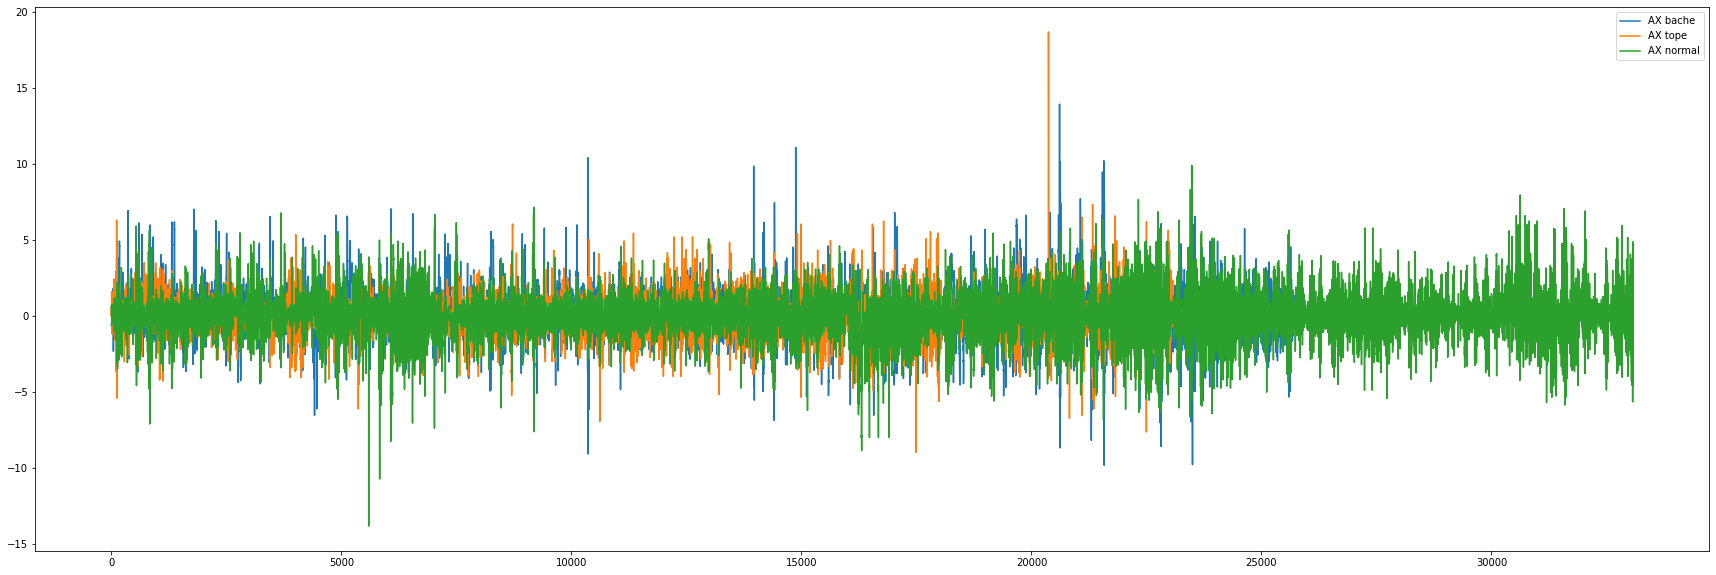

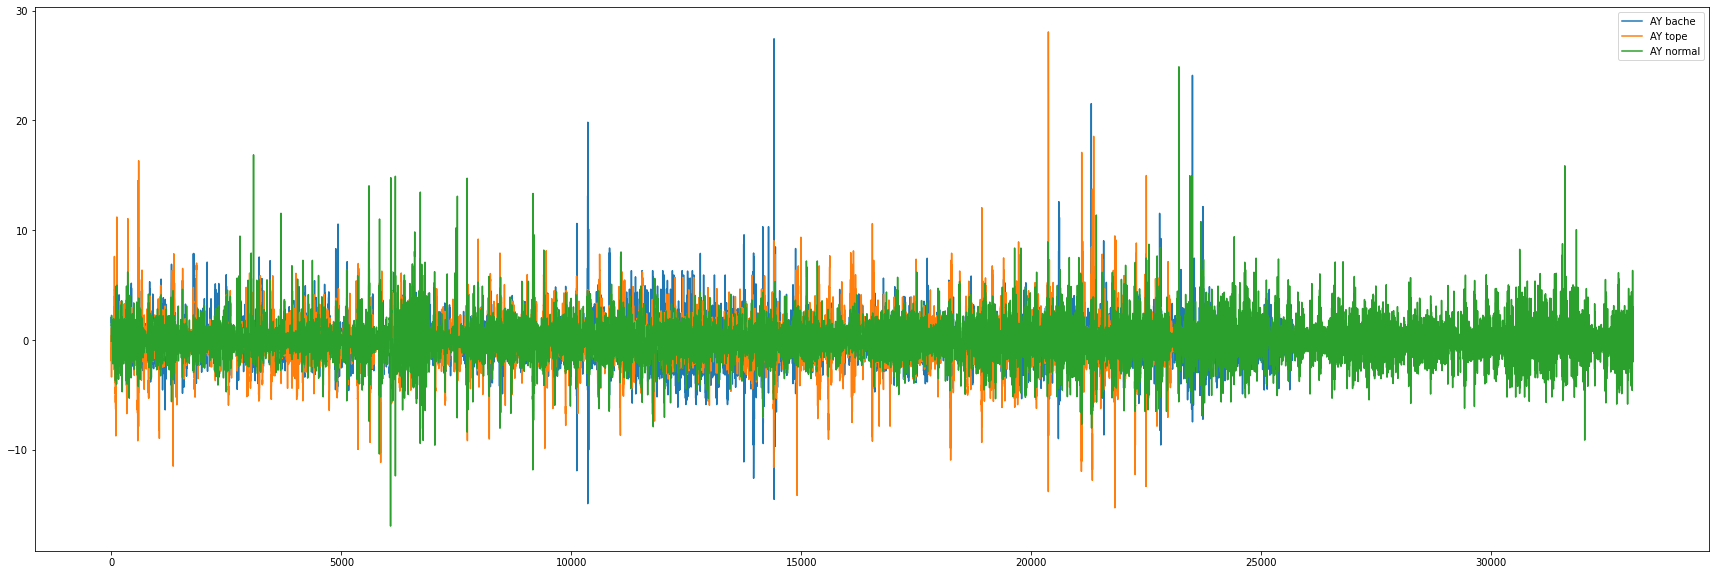

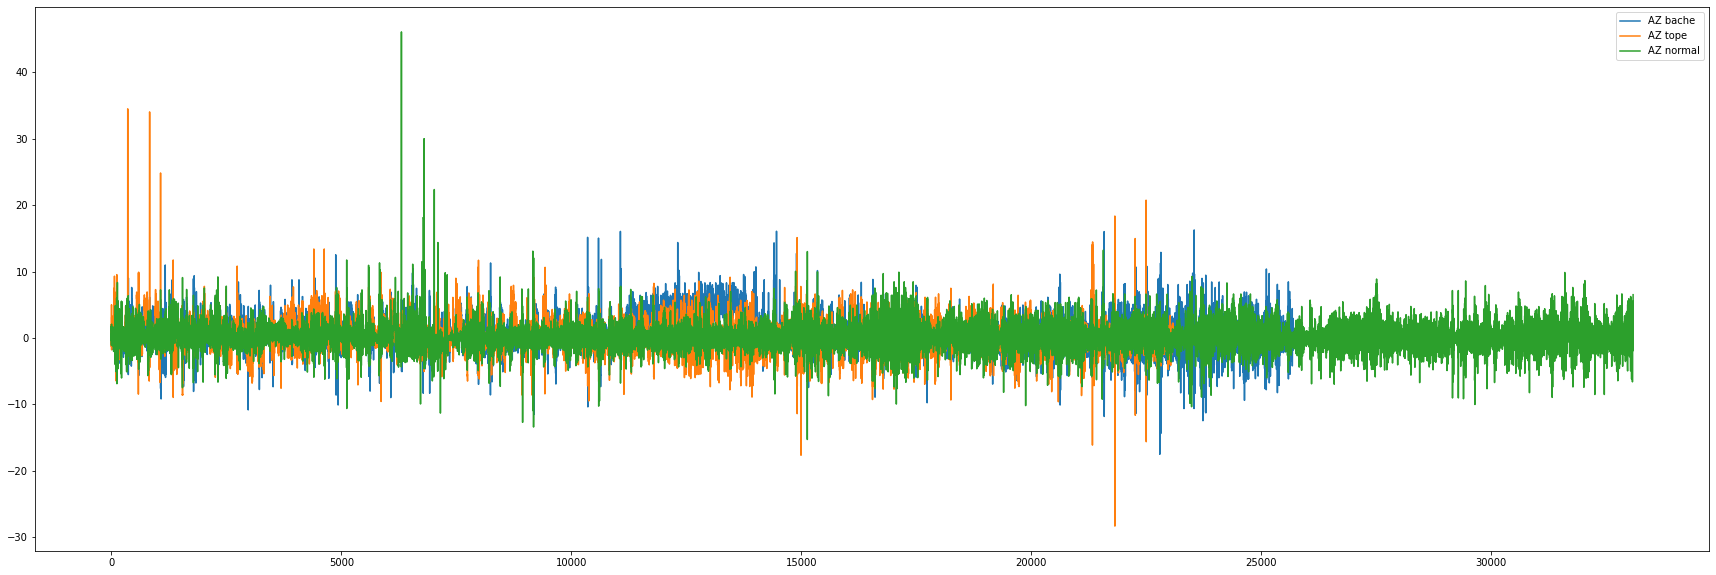

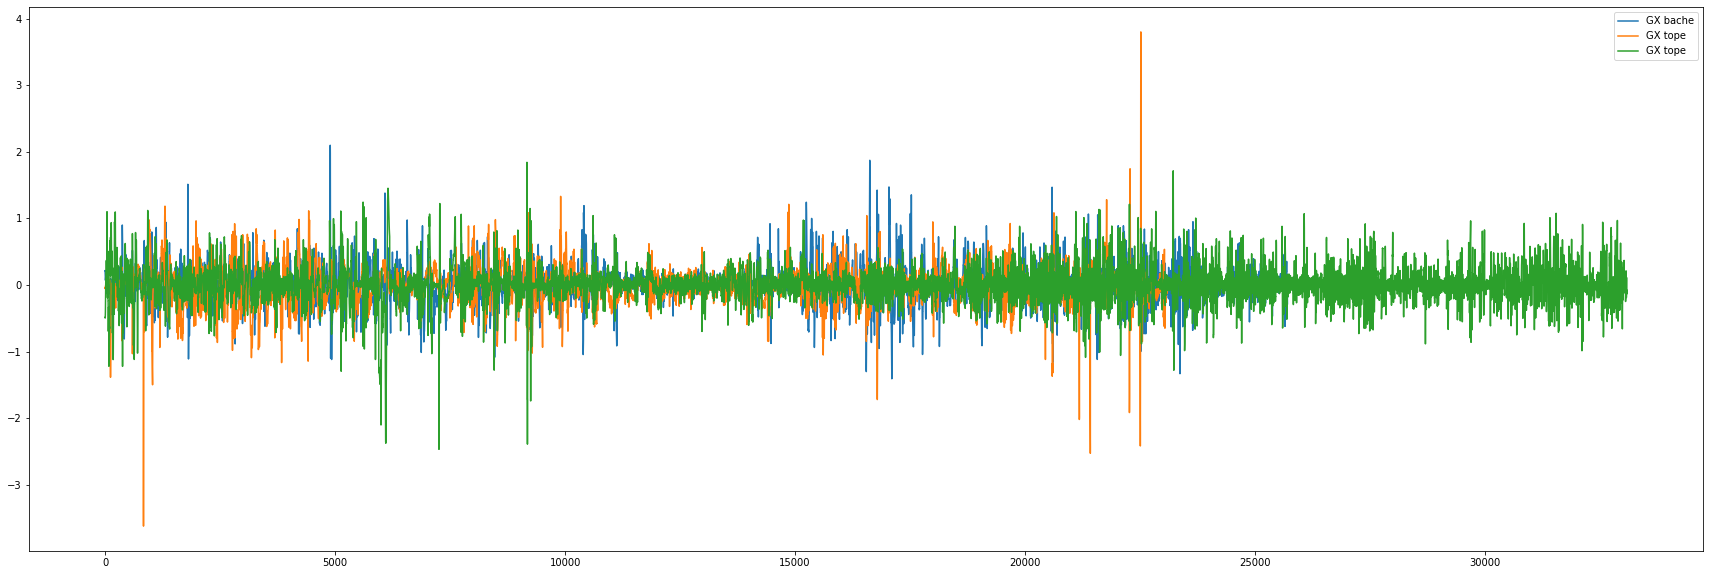

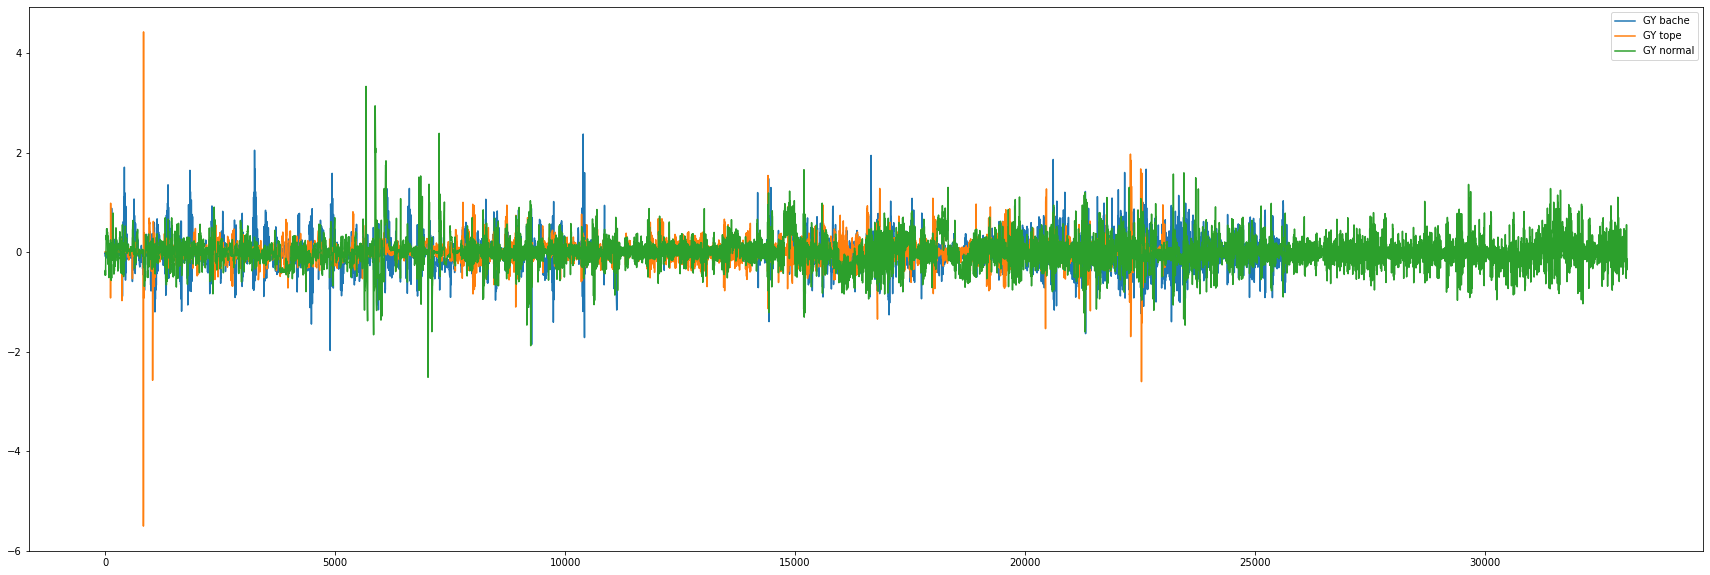

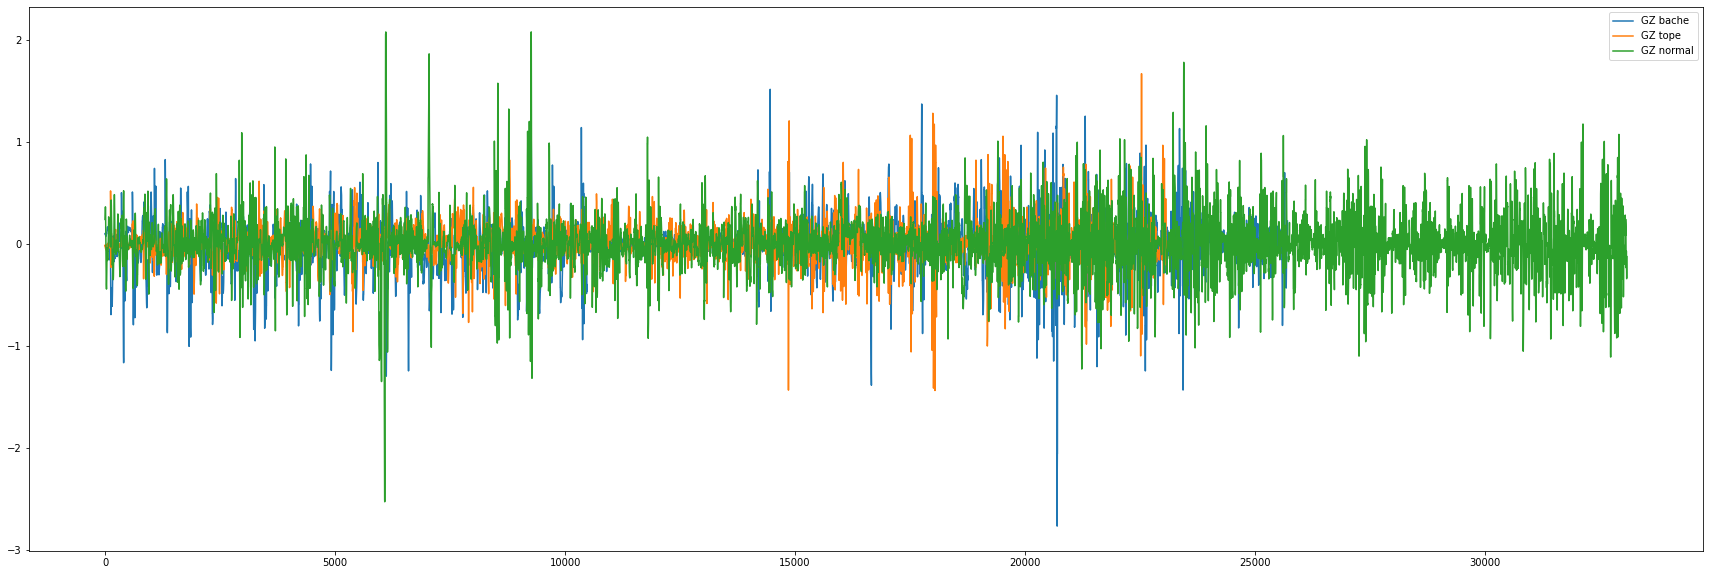

In [9]:
plotsaxis(bache,tope,normal)

In [10]:
countactivity= (df1['Activity'].value_counts())/238
countactivity

normal    139.0
bache     108.0
tope       97.0
Name: Activity, dtype: float64

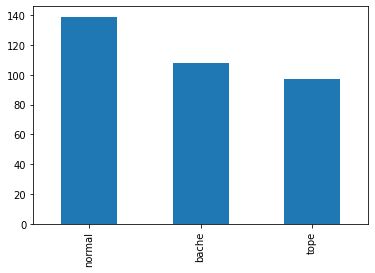

In [11]:
countactivity.plot(kind='bar')

In [12]:
bache = bache[bache['Activity']=='bache'].head(23086).copy()
tope = tope[tope['Activity']=='tope'].head(23086).copy()
normal = normal[normal['Activity']=='normal'].head(23086).copy()

In [13]:
print(bache['Activity'].value_counts())
print(tope['Activity'].value_counts())
print(normal['Activity'].value_counts())

bache    23086
Name: Activity, dtype: int64
tope    23086
Name: Activity, dtype: int64
normal    23086
Name: Activity, dtype: int64


In [14]:
df2 = pd.concat([bache,tope,normal])

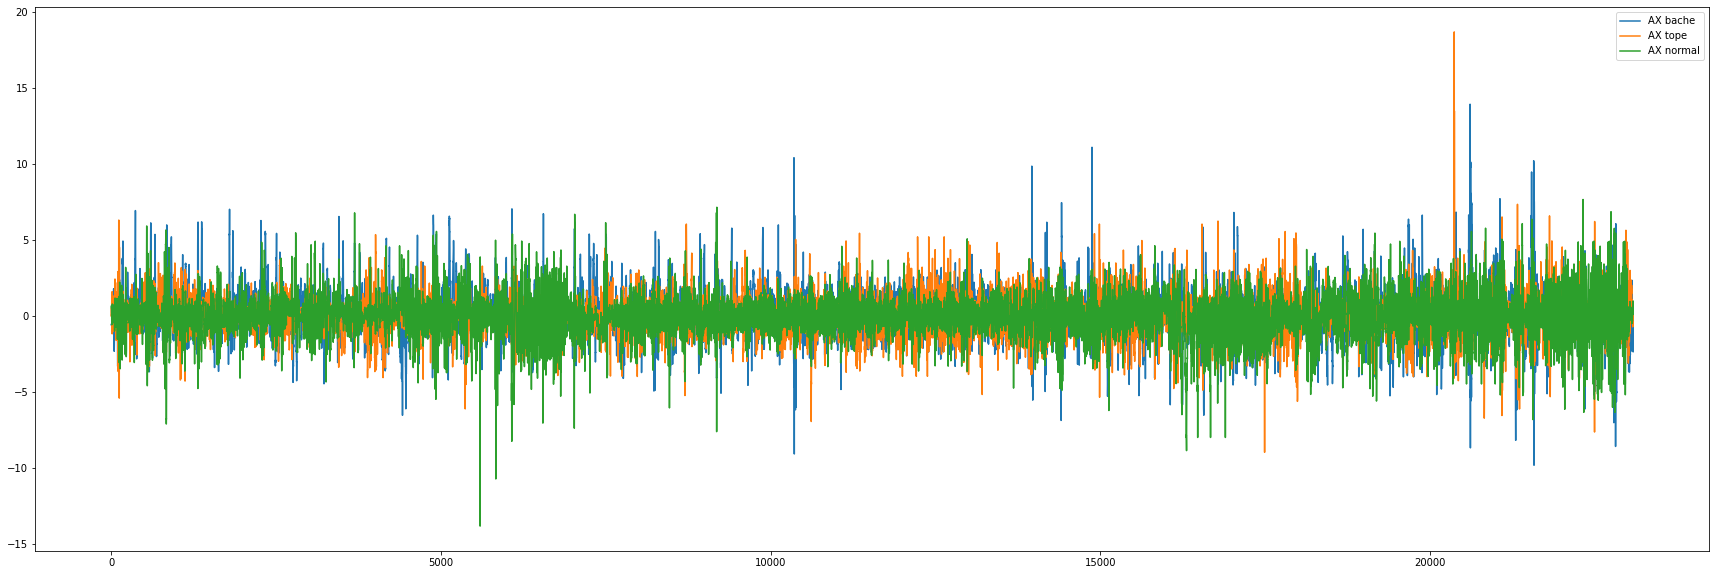

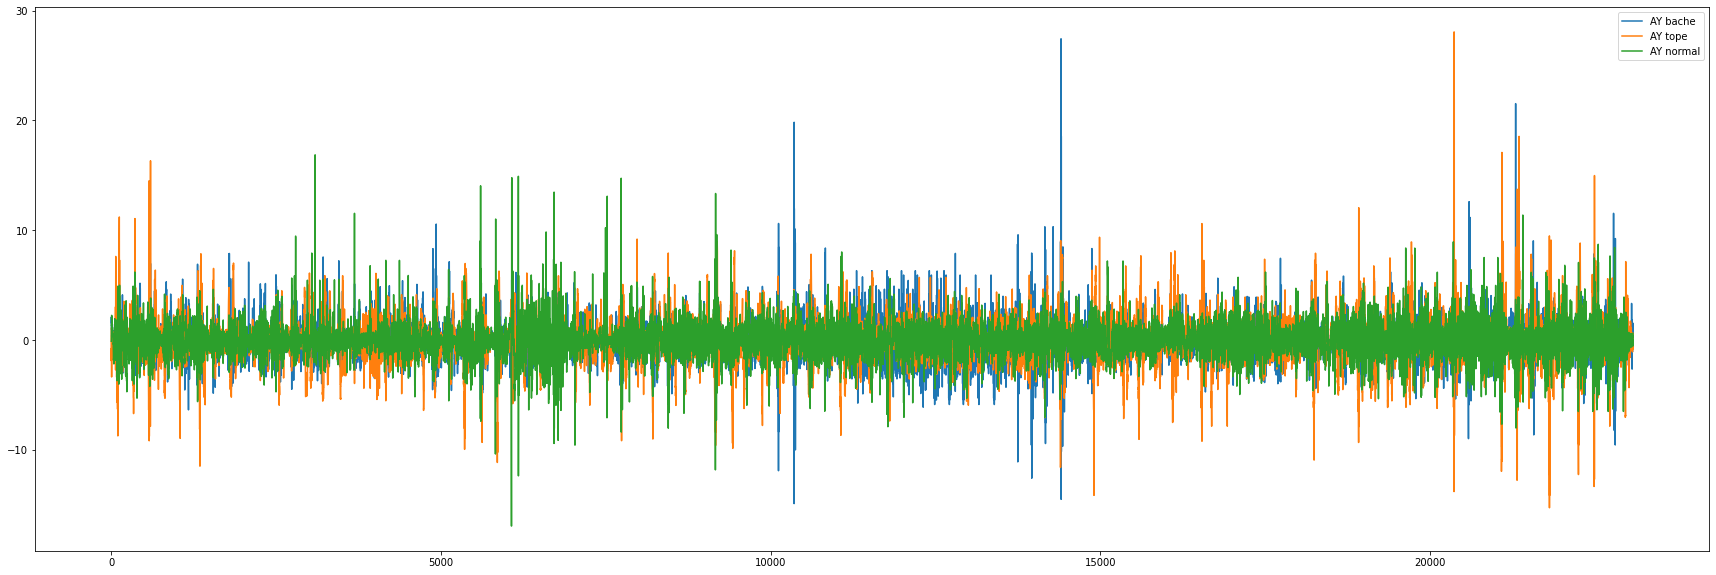

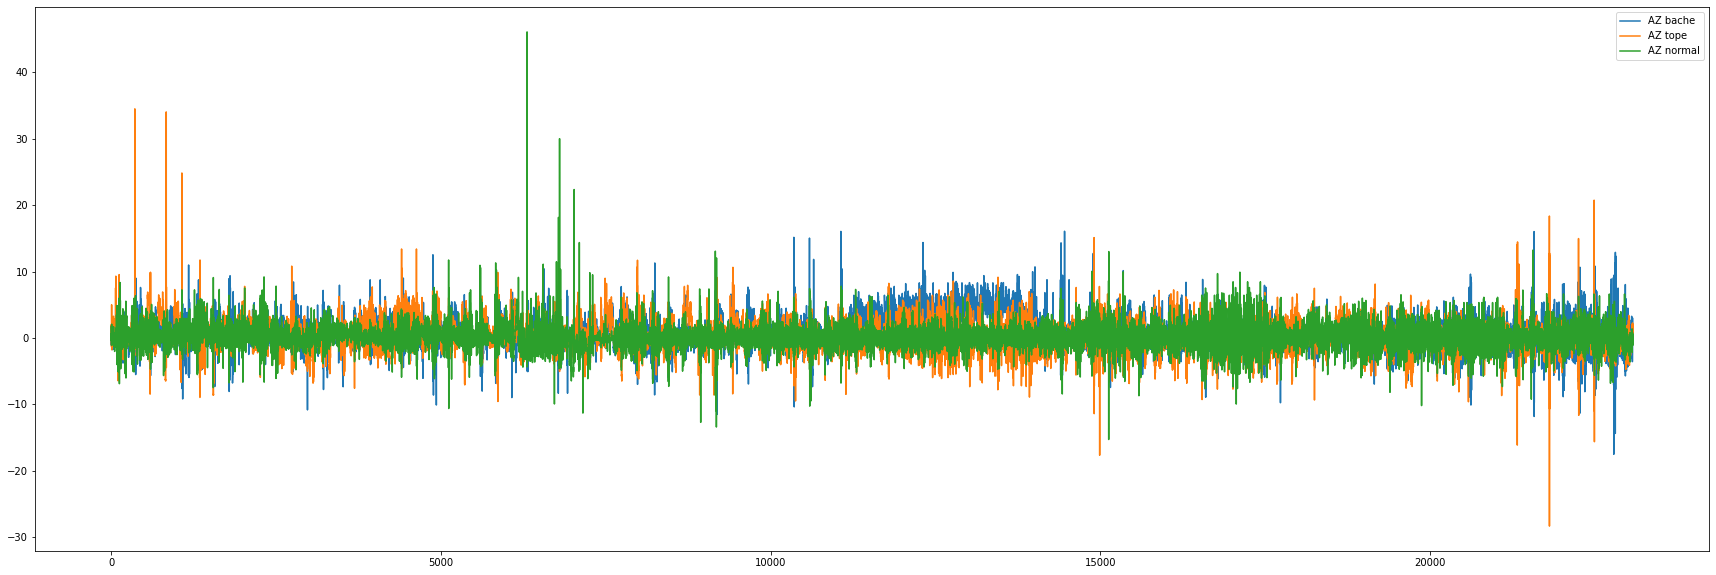

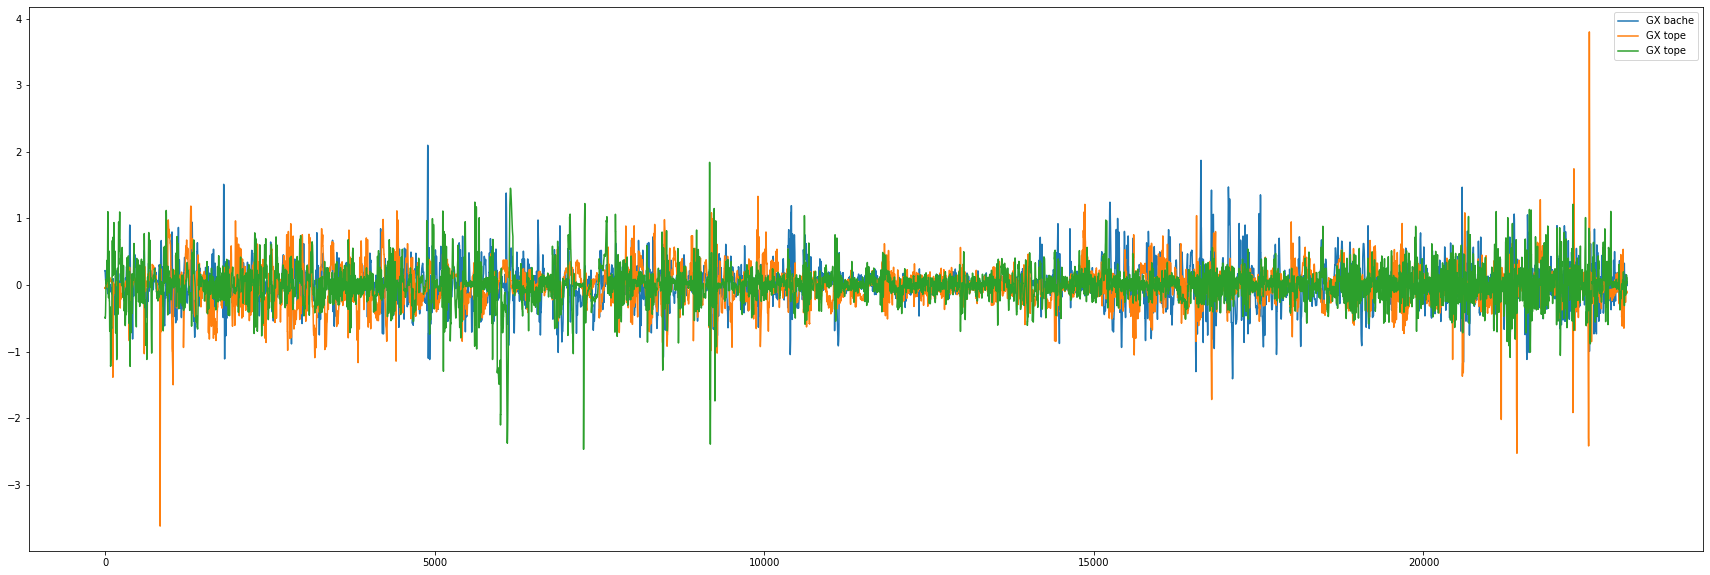

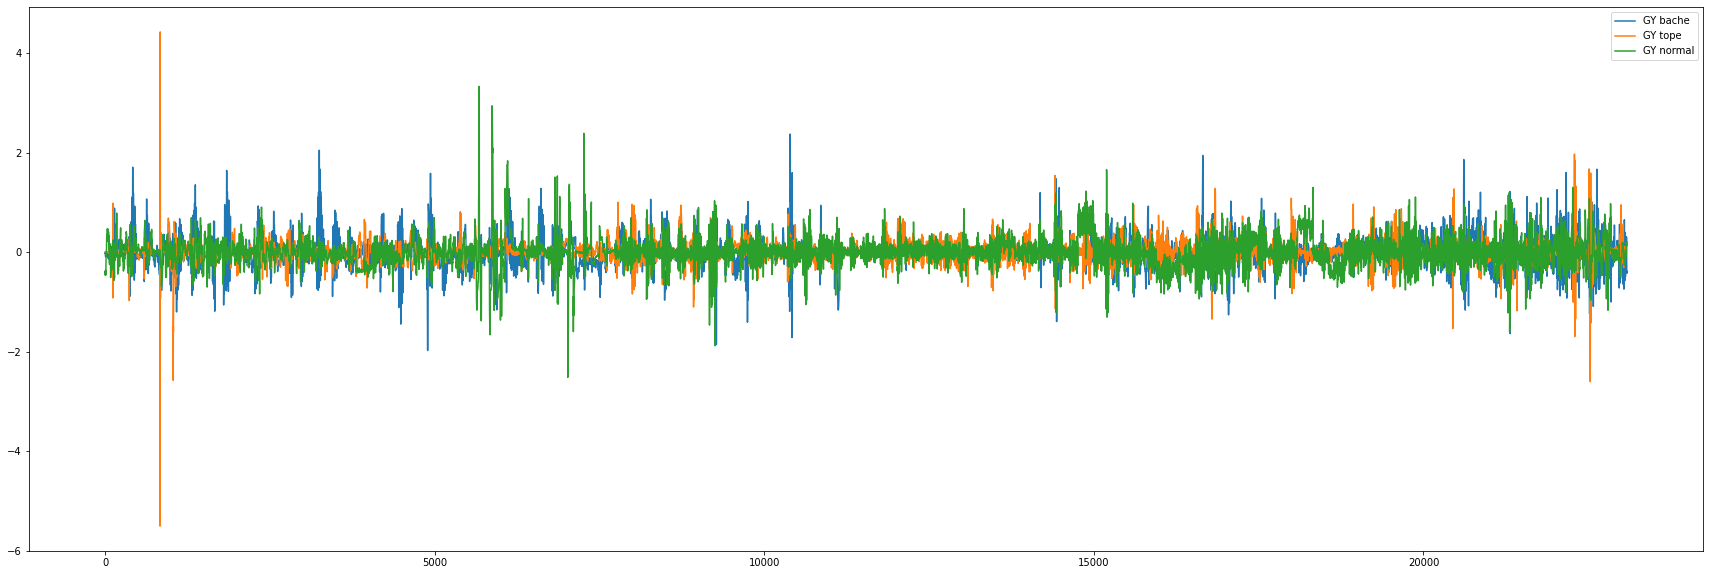

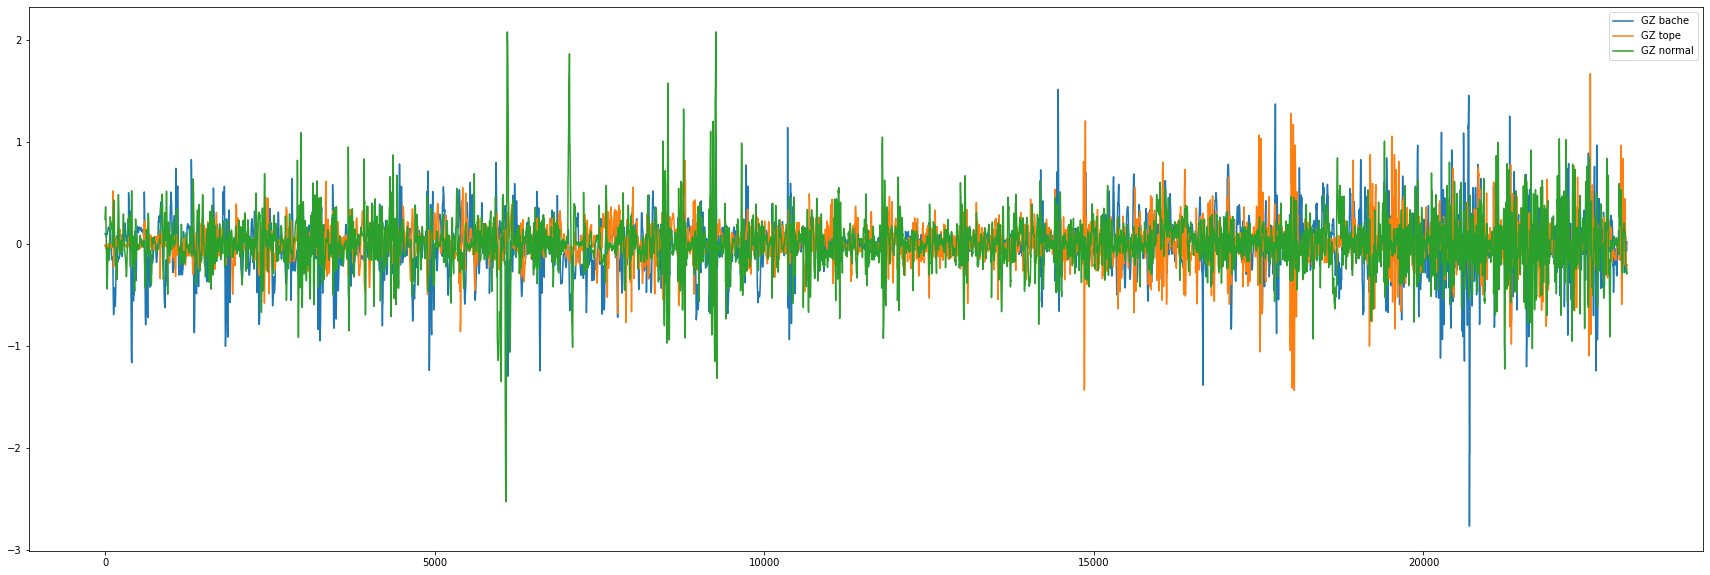

In [15]:
plotsaxis(bache,tope,normal)

In [16]:
def axisn(activity,df):
  rowactivity = (df['Activity']==activity)
  data = df[rowactivity]
  data = data[['AX','AY','AZ','GX','GY','GZ']]
  ax = data.plot(subplots=True, figsize= (7,30), title = activity)

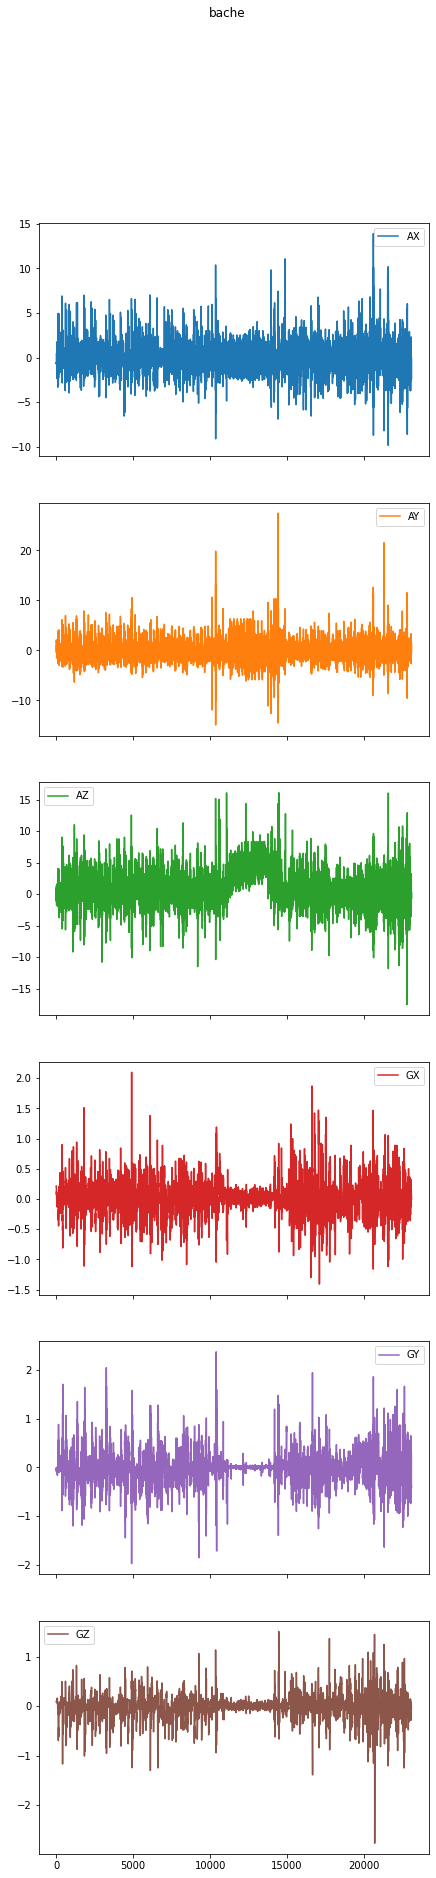

In [17]:
axisn('bache',df2)

In [18]:
def mean (df):
  df['MeanAX']= df['AX'].rolling(238).mean()
  df['MeanAY']= df['AY'].rolling(238).mean()
  df['MeanAZ']= df['AZ'].rolling(238).mean()
  df['MeanGX']= df['GX'].rolling(238).mean()
  df['MeanGY']= df['GY'].rolling(238).mean()
  df['MeanGZ']= df['GZ'].rolling(238).mean()

In [19]:
mean(bache)

In [20]:
mean(tope)

In [21]:
mean(normal)

In [22]:
bache.isnull().sum()


AX            0
AY            0
AZ            0
GX            0
GY            0
GZ            0
Activity      0
MeanAX      237
MeanAY      237
MeanAZ      237
MeanGX      237
MeanGY      237
MeanGZ      237
dtype: int64

In [23]:

bache = bache.copy()
bache["MeanAX"].fillna(bache["MeanAX"].mean(skipna=True), inplace=True)
bache["MeanAY"].fillna(bache["MeanAY"].mean(skipna=True), inplace=True)
bache["MeanAZ"].fillna(bache["MeanAZ"].mean(skipna=True), inplace=True)
bache["MeanGX"].fillna(bache["MeanGX"].mean(skipna=True), inplace=True)
bache["MeanGY"].fillna(bache["MeanGY"].mean(skipna=True), inplace=True)
bache["MeanGZ"].fillna(bache["MeanGZ"].mean(skipna=True), inplace=True)

In [24]:

tope = tope.copy()
tope["MeanAX"].fillna(tope["MeanAX"].mean(skipna=True), inplace=True)
tope["MeanAY"].fillna(tope["MeanAY"].mean(skipna=True), inplace=True)
tope["MeanAZ"].fillna(tope["MeanAZ"].mean(skipna=True), inplace=True)
tope["MeanGX"].fillna(tope["MeanGX"].mean(skipna=True), inplace=True)
tope["MeanGY"].fillna(tope["MeanGY"].mean(skipna=True), inplace=True)
tope["MeanGZ"].fillna(tope["MeanGZ"].mean(skipna=True), inplace=True)

In [25]:
normal = normal.copy()
normal["MeanAX"].fillna(normal["MeanAX"].mean(skipna=True), inplace=True)
normal["MeanAY"].fillna(normal["MeanAY"].mean(skipna=True), inplace=True)
normal["MeanAZ"].fillna(normal["MeanAZ"].mean(skipna=True), inplace=True)
normal["MeanGX"].fillna(normal["MeanGX"].mean(skipna=True), inplace=True)
normal["MeanGY"].fillna(normal["MeanGY"].mean(skipna=True), inplace=True)
normal["MeanGZ"].fillna(normal["MeanGZ"].mean(skipna=True), inplace=True)

In [26]:
def plotsmean (df1,df2,df3):
  plt.figure( figsize= (30,10))
  plt.plot(df1.MeanAX,label='Mean AX bache')
  plt.plot(df2.MeanAX, label='Mean AX tope')
  plt.plot(df3.MeanAX, label='Mean AX normal')
  plt.legend()
  plt.show()
  plt.figure( figsize= (30,10))
  plt.plot(df1.MeanAY,label='Mean AY bache')
  plt.plot(df2.MeanAY, label='Mean AY tope')
  plt.plot(df3.MeanAY, label='Mean AY normal')
  plt.legend()
  plt.show()
  plt.figure( figsize= (30,10))
  plt.plot(df1.MeanAZ,label='Mean AZ bache')
  plt.plot(df2.MeanAZ, label='Mean AZ tope')
  plt.plot(df3.MeanAZ, label='Mean AZ normal')  
  plt.legend()
  plt.show()
  plt.figure( figsize= (30,10))
  plt.plot(df1.MeanGX,label='Mean GX bache')
  plt.plot(df2.MeanGX, label='Mean GX tope')
  plt.plot(df3.MeanGX, label='Mean GX tope')
  plt.legend()
  plt.show()
  plt.figure( figsize= (30,10))
  plt.plot(df1.MeanGY,label='Mean GY bache')
  plt.plot(df2.MeanGY, label='Mean GY tope')
  plt.plot(df3.MeanGY, label='Mean GY normal')
  plt.legend()
  plt.show()
  plt.figure( figsize= (30,10))
  plt.plot(df1.MeanGZ,label='Mean GZ bache')
  plt.plot(df2.MeanGZ, label='Mean GZ tope')
  plt.plot(df3.MeanGZ, label='Mean GZ normal')

  plt.legend()
  plt.show()

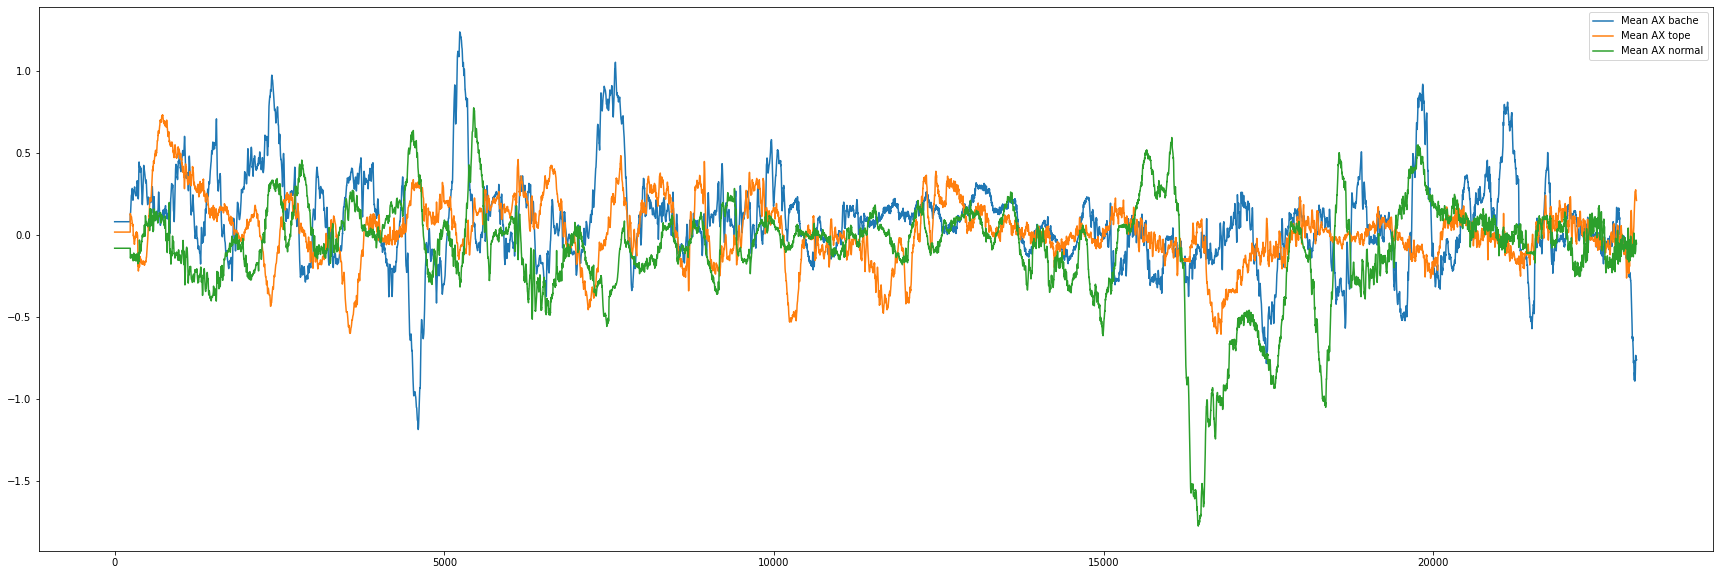

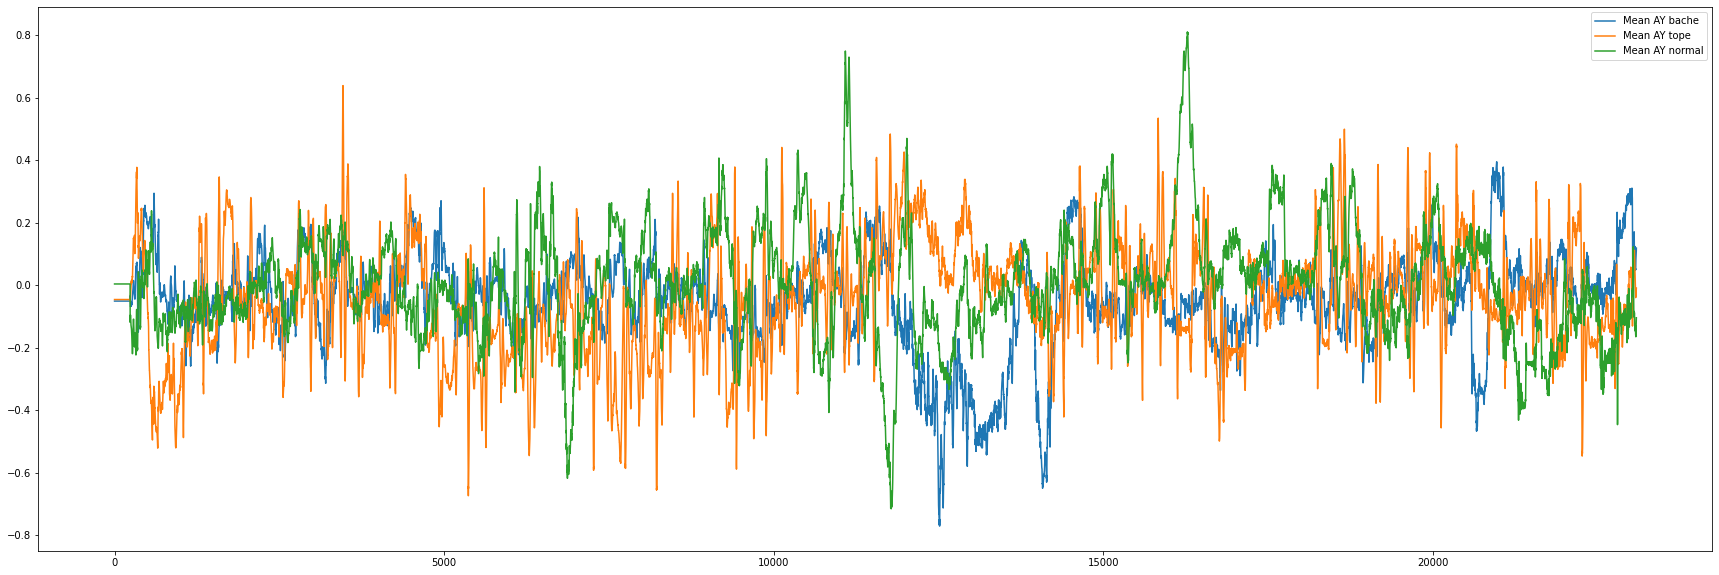

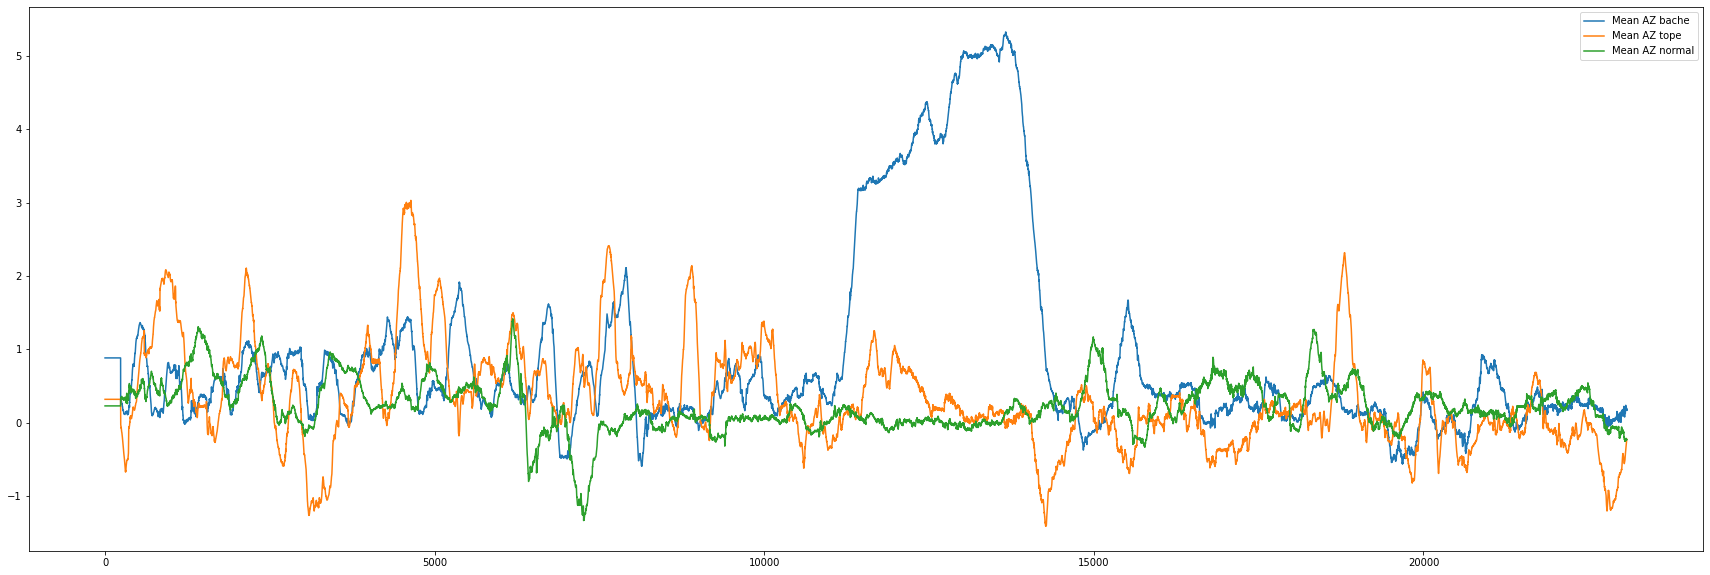

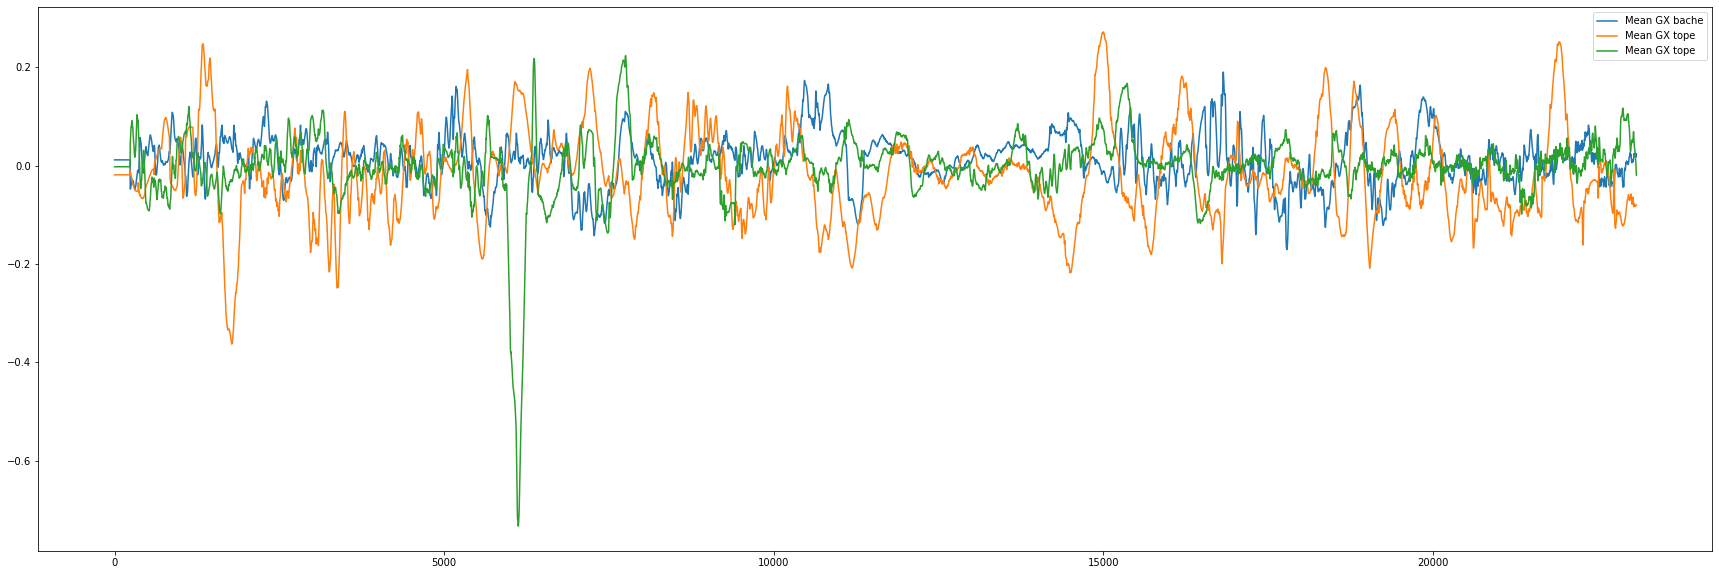

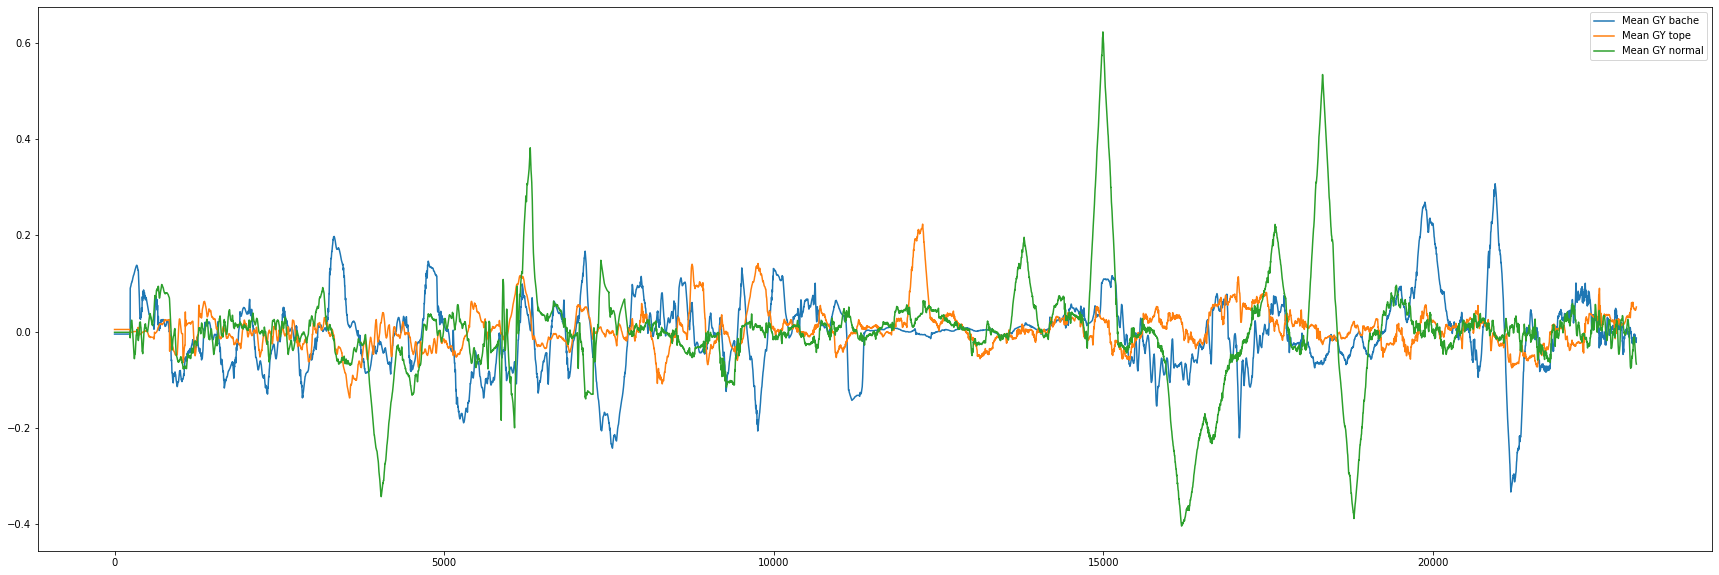

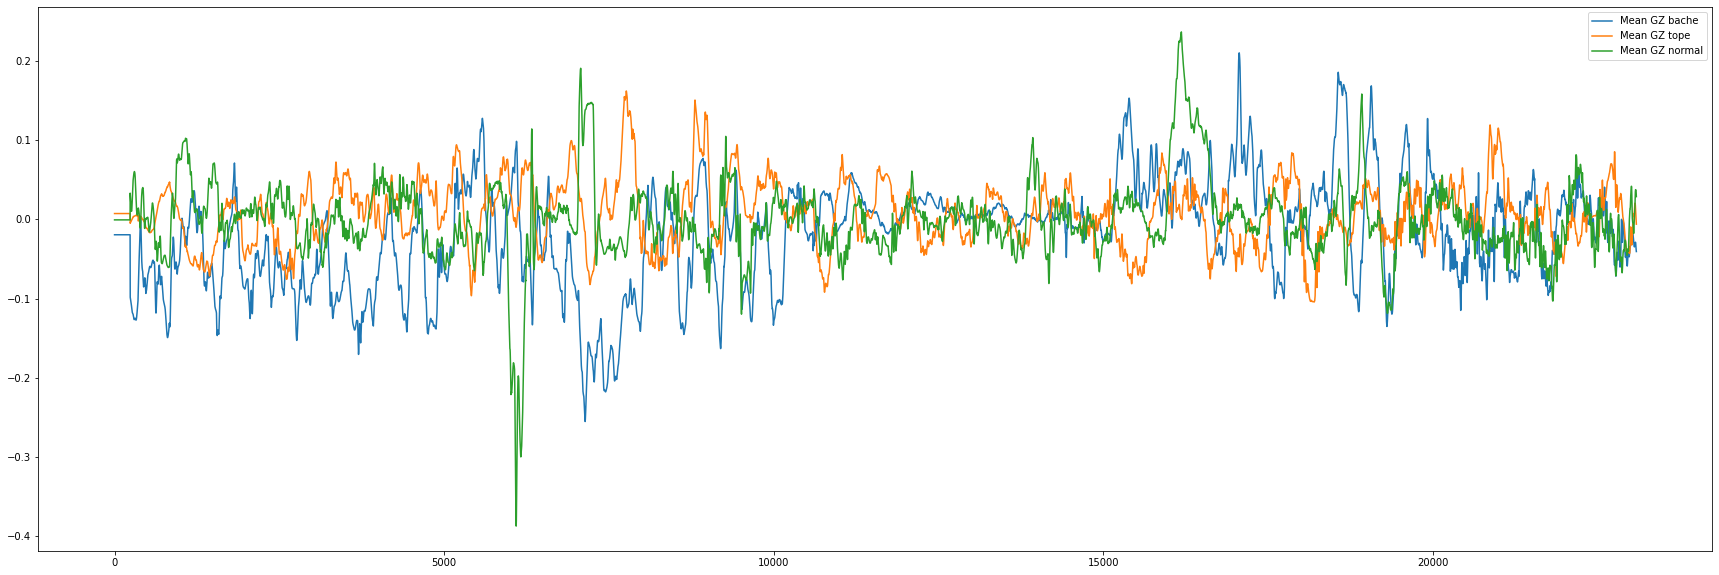

In [27]:
plotsmean(bache,tope,normal)

In [28]:
#df = pd.concat([bache,tope,normal])
df = pd.concat([bache,tope])


In [29]:
countactivity= (df['Activity'].value_counts())/238
countactivity

bache    97.0
tope     97.0
Name: Activity, dtype: float64

In [30]:
def axis(activity,df):
  rowactivity = (df['Activity']==activity)
  data = df[rowactivity]
  data = data[['MeanAX','MeanAY','MeanAZ','MeanGX','MeanGY','MeanGZ']]
  ax = data.plot(subplots=True, figsize= (7,30), title = activity)

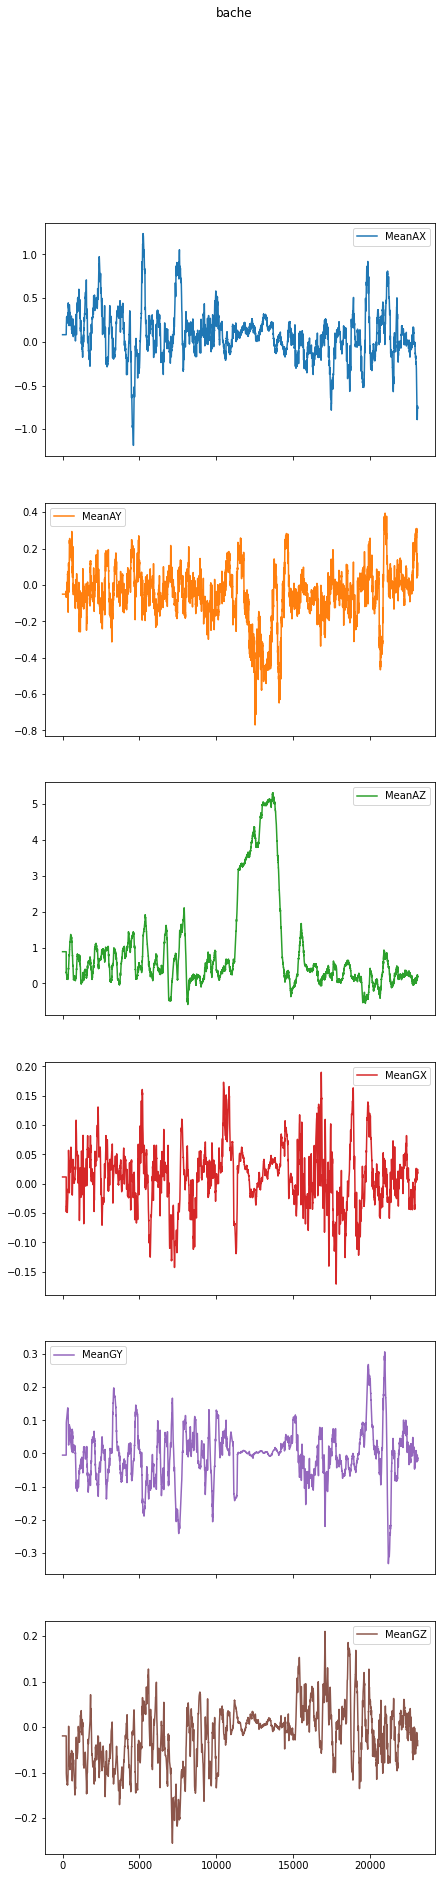

In [31]:
axis ('bache',df)

In [32]:
df['Activity'].value_counts()

bache    23086
tope     23086
Name: Activity, dtype: int64

In [33]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([bache,tope])
#balanced_data = balanced_data.append([bache,tope,normal])


balanced_data.shape

(46172, 13)

In [34]:
balanced_data['Activity'].value_counts()

bache    23086
tope     23086
Name: Activity, dtype: int64

In [35]:
balanced_data.head()

,AX,AY,AZ,GX,GY,GZ,Activity,MeanAX,MeanAY,MeanAZ,MeanGX,MeanGY,MeanGZ
0,-0.606590,1.560097,-1.025081,0.215254,-0.022984,0.097051,bache,0.081981,-0.050445,0.885124,0.011605,-0.005167,-0.019353
1,-0.540882,2.096340,-0.096130,0.217086,-0.012599,0.098884,bache,0.081981,-0.050445,0.885124,0.011605,-0.005167,-0.019353
2,-0.575768,0.995061,-0.984110,0.197539,-0.007101,0.100106,bache,0.081981,-0.050445,0.885124,0.011605,-0.005167,-0.019353
3,-0.545888,1.004465,-1.026807,0.184710,-0.010156,0.100716,bache,0.081981,-0.050445,0.885124,0.011605,-0.005167,-0.019353
4,-0.542176,1.004201,-1.047549,0.160887,-0.020540,0.101327,bache,0.081981,-0.050445,0.885124,0.011605,-0.005167,-0.019353


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['Activity'])
balanced_data.head()

,AX,AY,AZ,GX,GY,GZ,Activity,MeanAX,MeanAY,MeanAZ,MeanGX,MeanGY,MeanGZ,label
0,-0.606590,1.560097,-1.025081,0.215254,-0.022984,0.097051,bache,0.081981,-0.050445,0.885124,0.011605,-0.005167,-0.019353,0
1,-0.540882,2.096340,-0.096130,0.217086,-0.012599,0.098884,bache,0.081981,-0.050445,0.885124,0.011605,-0.005167,-0.019353,0
2,-0.575768,0.995061,-0.984110,0.197539,-0.007101,0.100106,bache,0.081981,-0.050445,0.885124,0.011605,-0.005167,-0.019353,0
3,-0.545888,1.004465,-1.026807,0.184710,-0.010156,0.100716,bache,0.081981,-0.050445,0.885124,0.011605,-0.005167,-0.019353,0
4,-0.542176,1.004201,-1.047549,0.160887,-0.020540,0.101327,bache,0.081981,-0.050445,0.885124,0.011605,-0.005167,-0.019353,0


In [38]:
label.classes_

array(['bache', 'tope'], dtype=object)

In [39]:
df_embarked_one_hot = pd.get_dummies(balanced_data['label'], 
                                     prefix='label')

In [40]:
df_new_enc = pd.concat([balanced_data, 
                        df_embarked_one_hot], 
                        axis=1)

In [41]:
X = balanced_data[['MeanAX', 'MeanAY', 'MeanAZ', 'MeanGX', 'MeanGY', 'MeanGZ']]
y = balanced_data['label']


In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['MeanAX', 'MeanAY', 'MeanAZ', 'MeanGX', 'MeanGY', 'MeanGZ'])
scaled_X['label'] = y.values

scaled_X

,MeanAX,MeanAY,MeanAZ,MeanGX,MeanGY,MeanGZ,label
0,0.130899,-0.015347,0.261628,0.204033,-0.077841,-0.239973,0
1,0.130899,-0.015347,0.261628,0.204033,-0.077841,-0.239973,0
2,0.130899,-0.015347,0.261628,0.204033,-0.077841,-0.239973,0
3,0.130899,-0.015347,0.261628,0.204033,-0.077841,-0.239973,0
4,0.130899,-0.015347,0.261628,0.204033,-0.077841,-0.239973,0
...,...,...,...,...,...,...,...
46167,0.720021,0.140044,-0.778664,-1.038942,0.792749,0.097787,1
46168,0.705899,0.167154,-0.777259,-1.036944,0.804767,0.073386,1
46169,0.695001,0.188577,-0.774210,-1.035220,0.816282,0.049261,1
46170,0.685731,0.218482,-0.766814,-1.034497,0.826876,0.024585,1


In [43]:
import scipy.stats as stats

In [44]:
Fs = 10
frame_size = 238
hop_size = Fs*2 #

In [45]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 6

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        ax = df['MeanAX'].values[i: i + frame_size]
        ay = df['MeanAY'].values[i: i + frame_size]
        az = df['MeanAZ'].values[i: i + frame_size]
        gx = df['MeanGX'].values[i: i + frame_size]
        gy = df['MeanGY'].values[i: i + frame_size]
        gz = df['MeanGZ'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([ax, ay, az, gx, gy, gz])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [46]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [47]:
X.shape, y.shape


((2297, 238, 6), (2297,))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((1837, 238, 6), (460, 238, 6))

In [49]:
X_train[0].shape, X_test[0].shape

((238, 6), (238, 6))

In [50]:
X_train = X_train.reshape(1837, 238, 6, 1)
X_test = X_test.reshape(460, 238, 6, 1)

In [51]:
X_train[0].shape, X_test[0].shape

((238, 6, 1), (238, 6, 1))

In [52]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [53]:
history = model.fit(X_train, y_train, epochs = 30, validation_data= (X_test, y_test), verbose=1)


Train on 1837 samples, validate on 460 samples
Epoch 1/30
1837/1837 [==============================] - 6s 3ms/sample - loss: 0.4304 - accuracy: 0.8035 - val_loss: 0.3091 - val_accuracy: 0.8543
Epoch 2/30
1837/1837 [==============================] - 6s 3ms/sample - loss: 0.2838 - accuracy: 0.8759 - val_loss: 0.2643 - val_accuracy: 0.9022
Epoch 3/30
1837/1837 [==============================] - 4s 2ms/sample - loss: 0.2263 - accuracy: 0.8944 - val_loss: 0.2038 - val_accuracy: 0.9152
Epoch 4/30
1837/1837 [==============================] - 5s 3ms/sample - loss: 0.1793 - accuracy: 0.9178 - val_loss: 0.1641 - val_accuracy: 0.9413
Epoch 5/30
1837/1837 [==============================] - 4s 2ms/sample - loss: 0.1420 - accuracy: 0.9401 - val_loss: 0.1144 - val_accuracy: 0.9587
Epoch 6/30
1837/1837 [==============================] - 4s 2ms/sample - loss: 0.1194 - accuracy: 0.9499 - val_loss: 0.0988 - val_accuracy: 0.9674
Epoch 7/30
1837/1837 [==============================] - 4s 2ms/sample - loss:

In [54]:
print(model.evaluate(X_test, y_test))

460/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [55]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)



In [56]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

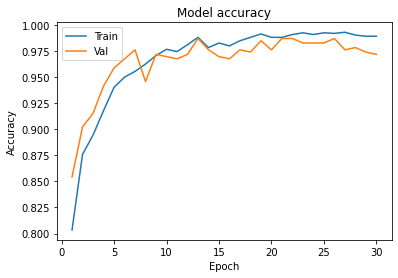

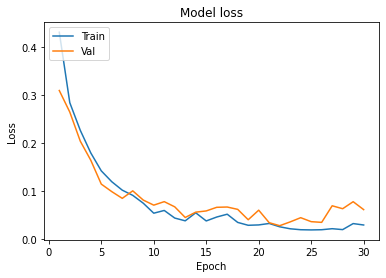

In [57]:
  plot_learningCurve(history, 30)

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [59]:
predictions = model.predict(X_test)





In [60]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [62]:
from mlxtend.plotting import plot_confusion_matrix

In [63]:

label.classes_

array(['bache', 'tope'], dtype=object)

In [64]:
print(tf.__version__)

2.0.0


In [66]:
y_pred = model.predict_classes(X_test)


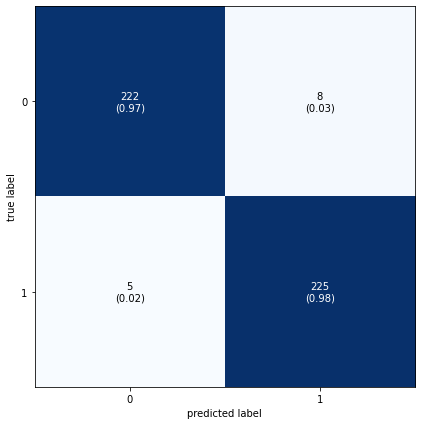

In [67]:
mat = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat= mat , show_normed=True, figsize=(7,7))
plt.show()